In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:

from google.colab import files
uploaded = files.upload()


Saving hotel_bookings[1].csv to hotel_bookings[1] (1).csv


# Exploratory Data Analysis (EDA)

In [7]:
# Read the dataset into a DataFrame
import pandas as pd

df = pd.read_csv('hotel_bookings[1].csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:

# Show general information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Descriptive statistics for numerical columns
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# Number of rows and columns
df.shape


(119390, 32)

In [34]:
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16280
days_in_waiting_list                  0


In [43]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


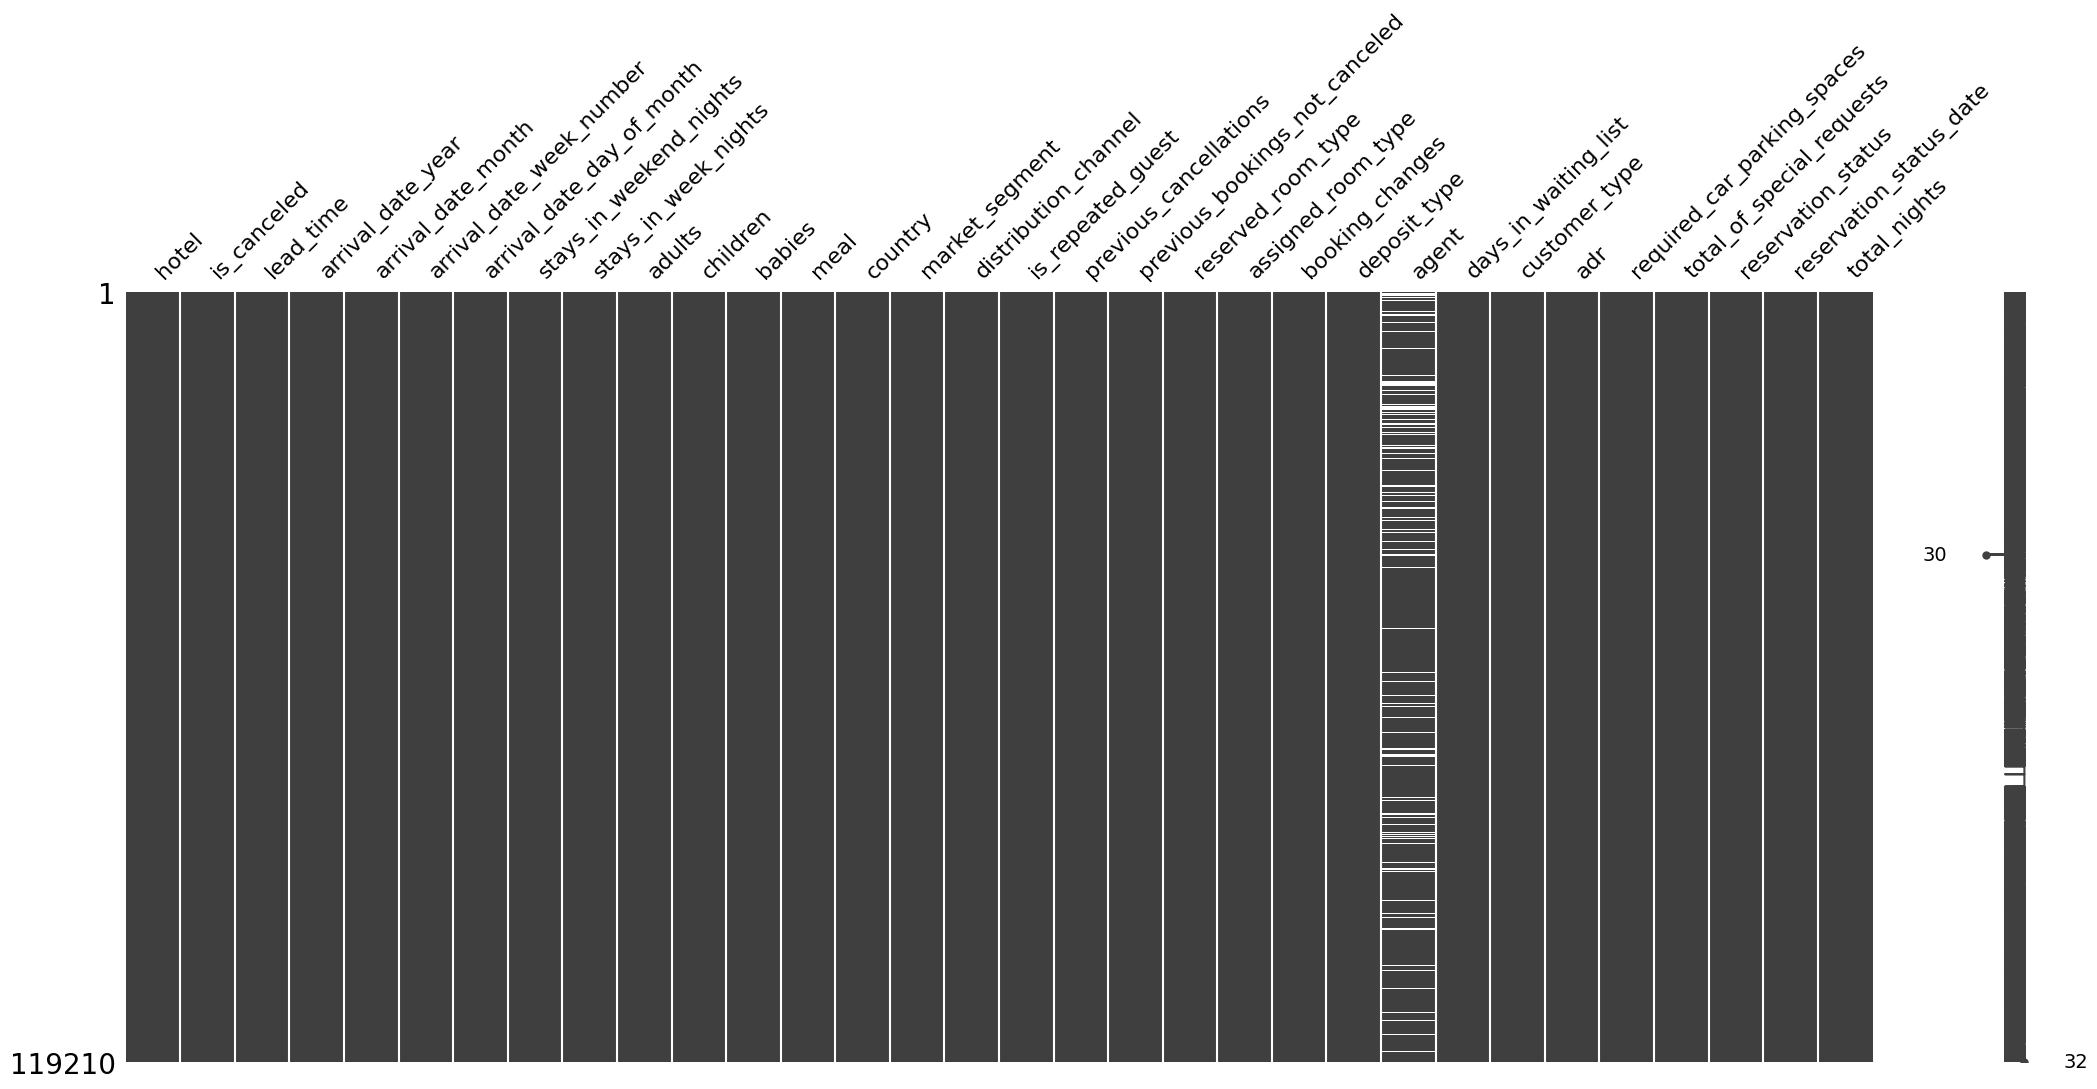

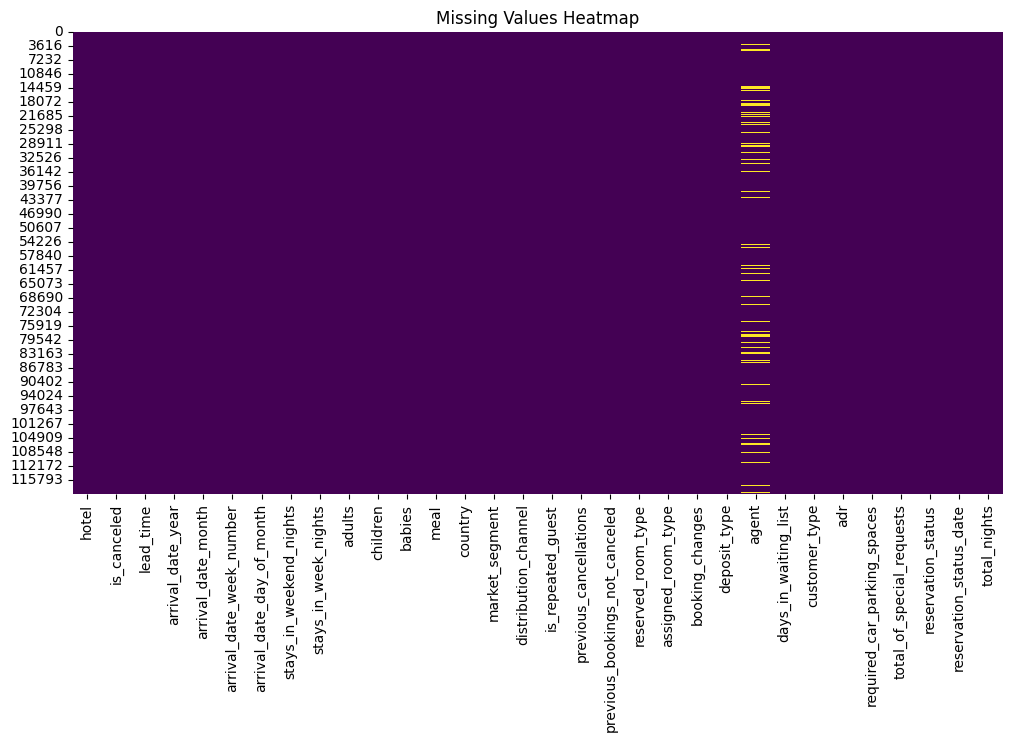

In [35]:
msno.matrix(df)
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


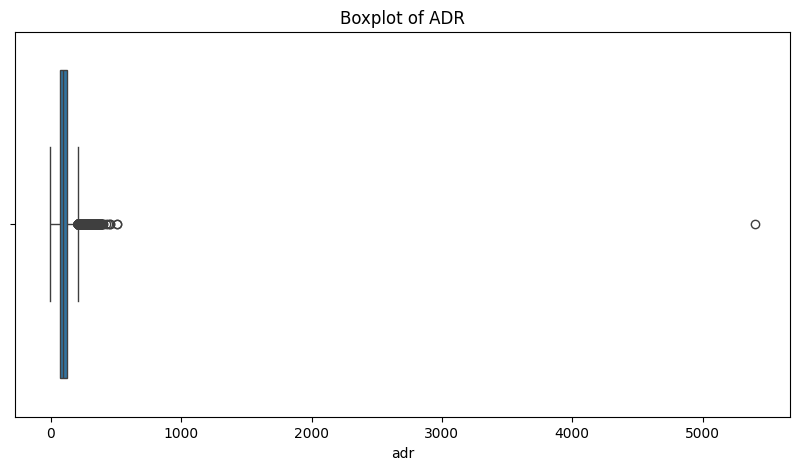

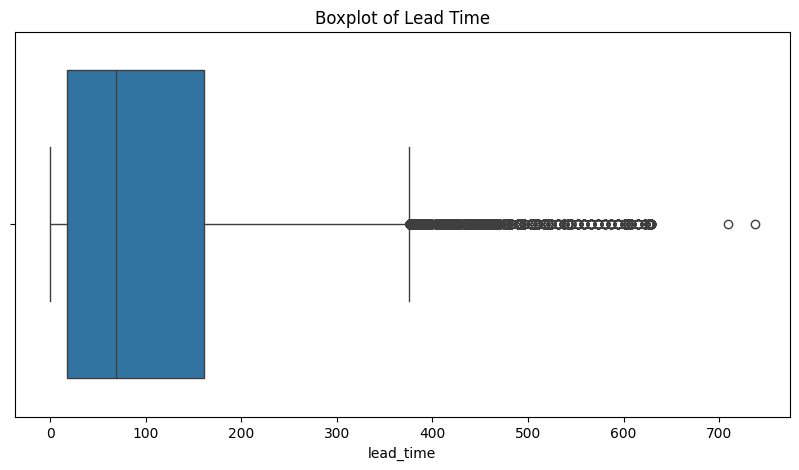

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['adr'])
plt.title("Boxplot of ADR")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['lead_time'])
plt.title("Boxplot of Lead Time")
plt.show()


# Data Cleaning

In [11]:
# Data Cleaning
# Fill missing values in 'country' column with "Unknown"
df['country'] = df['country'].fillna('Unknown')

df = df.drop(columns=['company'])

# Remove rows with bookings that have zero guests
df = df[~((df['adults']==0) & (df['children']==0) & (df['babies']==0))]


In [37]:
df = df.drop_duplicates()

# Handle outliers in ADR (cap at 1000)
df['adr'] = df['adr'].apply(lambda x: 1000 if x > 1000 else x)

# Fix date columns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [13]:

# Percentage of canceled bookings
df['is_canceled'].value_counts(normalize=True) * 100


,proportion
is_canceled,
0,62.923412
1,37.076588


In [14]:
# Average number of total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights'].mean()


np.float64(3.4262477980035233)

In [15]:
# Most common months for bookings
df['arrival_date_month'].value_counts()


,count
arrival_date_month,
August,13861
July,12644
May,11780
October,11147
April,11078
June,10929
September,10500
March,9768
February,8052


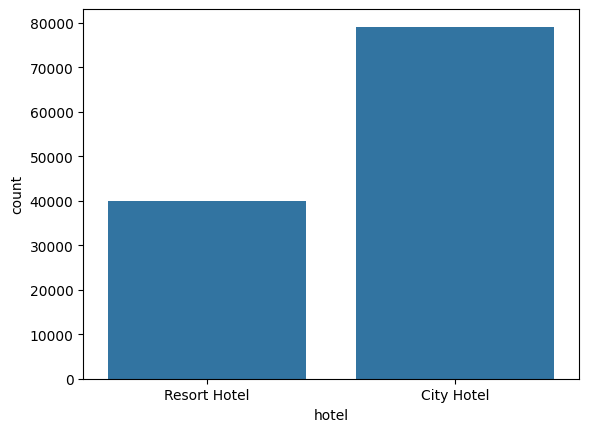

In [16]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of hotel types
sns.countplot(x='hotel', data=df)
plt.show()


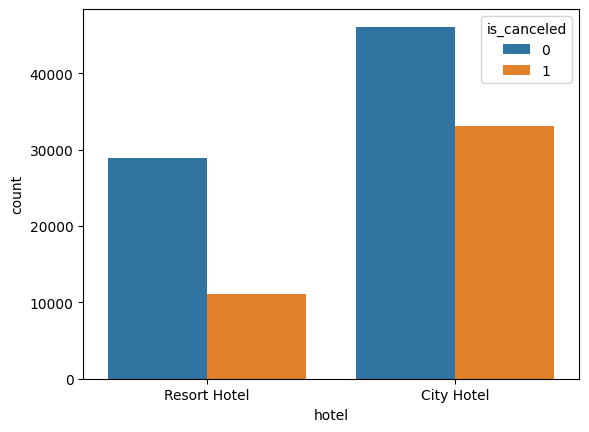

In [17]:
# Relationship between hotel type and cancellations
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.show()


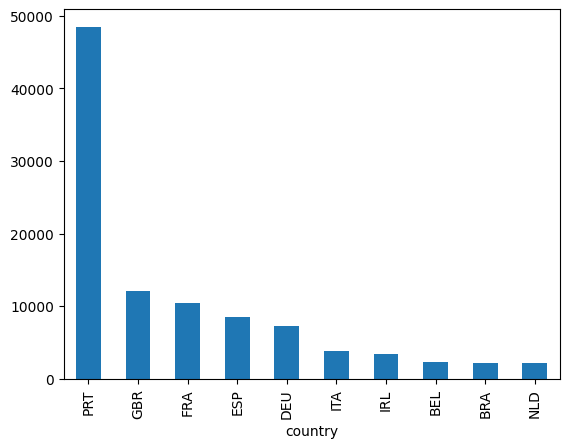

In [18]:
# Top 10 countries with the highest number of customers
df['country'].value_counts().head(10).plot(kind='bar')
plt.show()


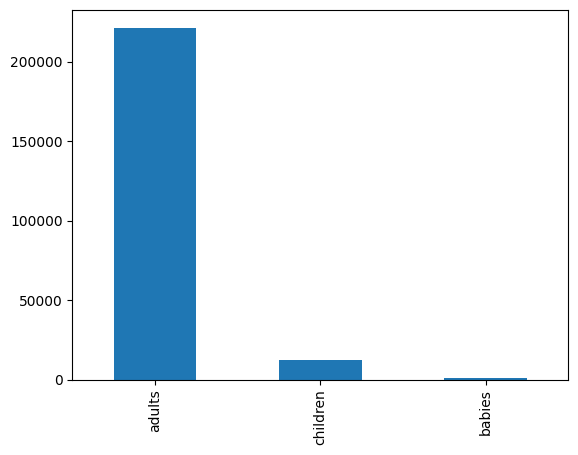

In [19]:
#  Distribution of guests (Adults / Children / Babies)
df[['adults','children','babies']].sum().plot(kind='bar')
plt.show()


# Data Processing & Feature Engineering

In [46]:
# Select useful features for modeling
features = ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
            'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies',
            'meal', 'country', 'market_segment', 'distribution_channel',
            'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
            'reserved_room_type', 'assigned_room_type', 'deposit_type',
            'agent', 'required_car_parking_spaces', 'total_of_special_requests']

target = 'is_canceled'

X = df[features]
y = df[target]


In [47]:
# Convert categorical variables into numeric using OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training & Evaluation

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Imputer for missing values + OneHotEncoder for categorical
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', SimpleImputer(strategy='median'), X.select_dtypes(exclude=['object', 'category']).columns)
    ],
    remainder='passthrough'
)

# Build pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'],
      dtype='object')),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['lead_time', 'arrival_date_year', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'agent',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8413872169676125

Confusion Matrix:
 [[11646  1003]
 [ 1764  3032]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     12649
           1       0.75      0.63      0.69      4796

    accuracy                           0.84     17445
   macro avg       0.81      0.78      0.79     17445
weighted avg       0.84      0.84      0.84     17445



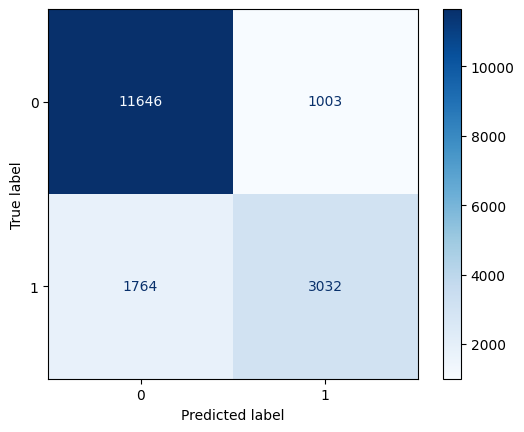

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


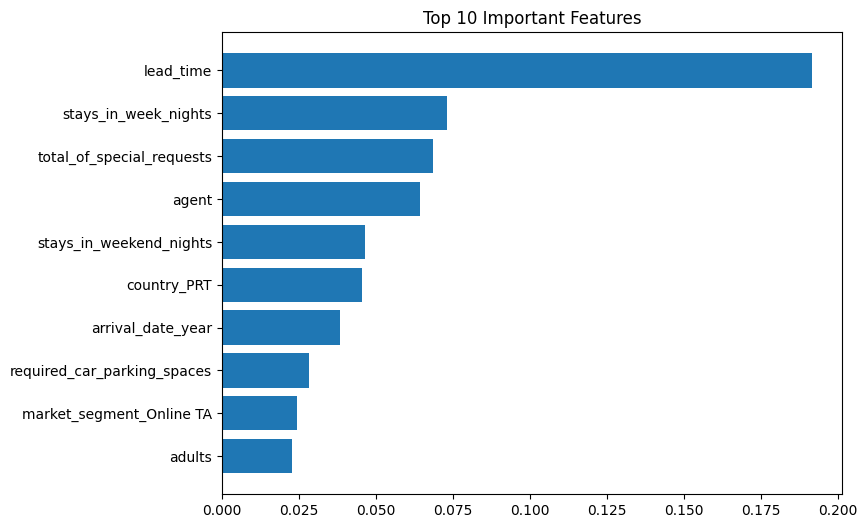

In [51]:
# Extract feature importance from Random Forest
import numpy as np

# Get feature names after OneHotEncoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([ohe_features, X.select_dtypes(exclude=['object']).columns])

# Match importance values
importances = model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[-10:]

# Plot top 10 important features
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [all_features[i] for i in indices])
plt.title("Top 10 Important Features")
plt.show()


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical = X_train.select_dtypes(include=['object']).columns
numerical = X_train.select_dtypes(include=['int64','float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)


In [56]:
from sklearn.impute import SimpleImputer

# Numeric imputer
num_imputer = SimpleImputer(strategy="median")

# Categorical imputer
cat_imputer = SimpleImputer(strategy="most_frequent")

# Pipeline: Imputation + Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', cat_imputer),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ]
)

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)


In [57]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_enc, y_train)

y_pred = model.predict(X_test_enc)


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#(Precision, Recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8397248495270851
Confusion Matrix:
 [[11615  1034]
 [ 1762  3034]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     12649
           1       0.75      0.63      0.68      4796

    accuracy                           0.84     17445
   macro avg       0.81      0.78      0.79     17445
weighted avg       0.83      0.84      0.84     17445



In [61]:

y_prob = model.predict_proba(X_test_enc)[:,1]


threshold = 0.4
y_pred_new = (y_prob >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.90      0.87      0.88     12649
           1       0.69      0.74      0.71      4796

    accuracy                           0.84     17445
   macro avg       0.79      0.80      0.80     17445
weighted avg       0.84      0.84      0.84     17445



In [62]:
import numpy as np
from sklearn.metrics import f1_score

y_prob = model.predict_proba(X_test_enc)[:,1]
thresholds = np.arange(0.1, 0.9, 0.05)

best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_temp = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred_temp, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best threshold:", best_thresh)
print("Best F1 for class 1:", best_f1)


Best threshold: 0.3500000000000001
Best F1 for class 1: 0.7162265595101416


In [63]:

y_pred_final = (y_prob >= 0.35).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


Accuracy: 0.8279736314130123
Confusion Matrix:
 [[10667  1982]
 [ 1019  3777]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88     12649
           1       0.66      0.79      0.72      4796

    accuracy                           0.83     17445
   macro avg       0.78      0.82      0.80     17445
weighted avg       0.84      0.83      0.83     17445



AUC: 0.8944491832502525


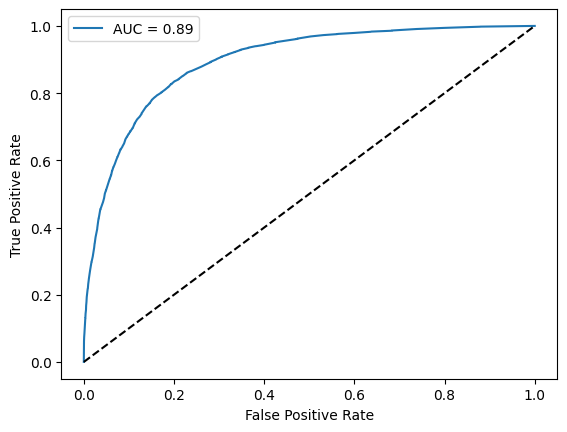

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_enc)[:,1]

auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
